#Visualization Generator

This notebook contains code to generate visualizations of semantic networks.[link text](https://)

In [5]:
import ast
import pandas as pd
import sys
import numpy as np
from tqdm.auto import tqdm
import networkx as nx
from numba import jit
from google.colab import drive
from scipy.stats import zscore
import matplotlib.pyplot as plt

###Set the Model, Temperature, and Maximum Output Tokens that Generated the Graph you Want to Visualize

In [2]:
model = "gemini-1.5-pro-001"
temperature = 0
max_output_tokens = 1536

###Visualize the Semantic Graph

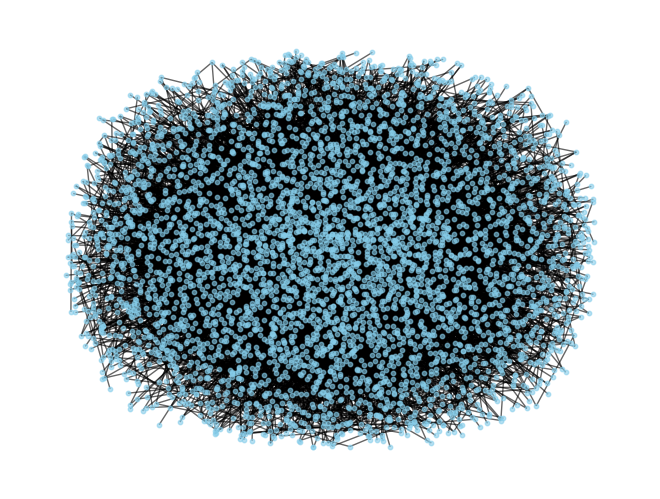

In [7]:
filename = (f'/data/semantic_gaphs/graph_model_{model}_'
            f'temp{temperature}_maxoutput{max_output_tokens}.txt')


f = open(filename, "r")
formatted_graphs_string = f.read()
f.close()
formatted_graphs = ast.literal_eval(formatted_graphs_string)

# Build the graph
G = nx.Graph()
for l in formatted_graphs:
    G.add_edges_from((triple['subject'], triple['target']) for triple in l)


# Use a spring layout for better visualization of large graphs
pos = nx.spring_layout(G, k=0.1, iterations=20)  # Adjust k and iterations as needed

# Draw the graph with reduced node size and labels only for a subset of nodes
nx.draw(G, pos, node_size=10, node_color="skyblue", alpha=0.6, with_labels=False)

plt.axis("off")  # Turn off the axis
plt.show()